In [ ]:
#ici je vais teste les resultat des difs algo pour voir la dif afin de choisir la meilleur pour notre dataset
#dapres les resultat svd est la meilleure methode 

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdramdani","key":"0850d17ece69fcc4d3fdbf3d1fa789d4"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#data set api 
!kaggle datasets download -d ruchi798/bookcrossing-dataset

 91% 69.0M/76.1M [00:01<00:00, 22.1MB/s]
100% 76.1M/76.1M [00:01<00:00, 42.7MB/s]


In [ ]:
#code to extract bookcrossing-dataset.zip
from zipfile import ZipFile
file_name="bookcrossing-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")


done


In [ ]:
#import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [ ]:
"""
books_data=pd.read_csv("/content/Books Data with Category Language and Summary/Preprocessed_data.csv",low_memory=False)
books_rat=pd.read_csv("/content/Book reviews/Book reviews/BX-Book-Ratings.csv",sep=';', encoding='latin-1',low_memory=False)
books_data=books_data.rename(columns={"isbn":"ISBN"})
print(books_data.shape,"\n",list(books_data.columns))
drop_c=['user_id','Unnamed: 0','age', 'location' , 'city', 'state', 'country',"rating"]
books_data=books_data.drop(drop_c,axis=1)
books_data=books_data.drop_duplicates(subset="ISBN")
books_data=books_data.drop_duplicates(subset="Summary")
#on enleve les column avec l'erreur de 9 
books_data=books_data[books_data["Summary"]!="9"]
books_data=books_data[books_data["Category"]!="9"]
#je garde que les livres en anglais 
books_data=books_data[books_data["Language"]=="en"]
print(books_data.shape)

"""

In [ ]:
"""
#jajoute le average rating et la somme des ratting pour les livres
#jenleve les rating =0 pour le calcule 
print("dataset des rating avant : ",books_rat.shape,books_rat["ISBN"].nunique(),books_rat["User-ID"].nunique())
books_rat_nnul=books_rat[books_rat["Book-Rating"]!=0]
print("dataset des rating apres l'elimination des valeurs ==0 : ",books_rat_nnul.shape,books_rat_nnul["ISBN"].nunique(),books_rat_nnul["User-ID"].nunique())
#nouveau diagramme


#average_rating
average_book=pd.DataFrame(books_rat_nnul.groupby("ISBN")["Book-Rating"].mean()).reset_index().rename(columns={"Book-Rating":"average_rating"})
#average_book.sort_values(by="average_rating",ascending=False)

books_data=pd.merge(books_data,average_book, on ="ISBN")

#somme rating
book_rating_Count=(books_rat_nnul.groupby(by=["ISBN"])["Book-Rating"].count().reset_index().
                   rename(columns={"Book-Rating":"SommeRating"}))
books_data=pd.merge(books_data,book_rating_Count, on ="ISBN")
print(books_data.shape)
#books_data
"""

dataset des rating avant :  (1149780, 3) 340556 105283
dataset des rating apres l'elimination des valeurs ==0 :  (433671, 3) 185973 77805
(75288, 13)


(216926, 3) Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [ ]:
"""
#j'utilise que les rating sans les 0
books_rating=pd.merge(books_rat_nnul,books_data["ISBN"],on="ISBN")
print(books_rating.shape,books_rating.columns)
#on prend un user avec > 15 ratting 
print(books_rating.shape,books_rating["User-ID"].nunique(),books_rating["ISBN"].nunique())
#groupe1= books_rat_nnul["User-ID"].value_counts()
groupe1=pd.DataFrame(books_rating.groupby("User-ID")["ISBN"].count()).reset_index().rename(columns={"ISBN":"Nb_book_rated"})
print(groupe1.shape)
groupe1=groupe1.query("Nb_book_rated >=15")
print(groupe1.shape)
books_rat2=pd.merge(books_rating,groupe1["User-ID"], on ="User-ID",how="inner")
print(books_rat2.shape,books_rat2["User-ID"].nunique(),books_rat2["ISBN"].nunique())
"""

(216926, 3) 46162 75288
(46162, 2)
(2563, 2)
(118152, 3) 2563 55031


In [ ]:
"""
#je prends les livres qui existe dans books_rat2
books_rat_isbn=books_rat2.drop_duplicates(subset="ISBN")
print(books_rat_isbn.shape)
books_data2=pd.merge(books_data,books_rat_isbn["ISBN"], on ="ISBN",how="inner")
print(books_data2.shape,books_rat2["ISBN"].nunique())
"""

(55031, 3)
(55031, 13) 55031


In [ ]:
#sinon si je telecharge le dataset de mon pc 
import pickle
#pickle_in=open("/content/sample_data/books_data_final.pickle","rb")
#books_data2=pickle.load(pickle_in)
pickle_in=open("/content/books_rating_final.pickle","rb")
books_rat2=pickle.load(pickle_in)


In [ ]:
! pip install surprise

     |████████████████████████████████| 11.8MB 3.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617621 sha256=3df5b40e4a9cc3ef49545985830305e4d9bf2ca59c24f489d775399cfff47908
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD , SVDpp , NMF , CoClustering , SlopeOne
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
reader = Reader(rating_scale=(1, 10))

In [ ]:
data1 = Dataset.load_from_df(books_rat2[['User-ID', 'ISBN', 'Book-Rating']], reader)
svd1 = SVD()


In [ ]:
#trainset = data.build_full_trainset()
#svd1.fit(trainset)
#svd1.predict(191883, "0878574808"	)

In [ ]:
#evaluation de SVD1
# test set is made of 20% of the ratings.
trainset, testset = train_test_split(data1, test_size=.20)


# Train the algorithm on the trainset, and predict ratings for the testset
svd1.fit(trainset)
predictions = svd1.test(testset)

# Then compute RMSE and MAE
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.5442
MAE:  1.1772


1.1772176312238363

In [ ]:
#on essaye sur SVDPP

In [ ]:
# test set is made from 20% of the ratings.

svdpp = SVDpp()
trainset, testset = train_test_split(data1, test_size=.20)


#elle prend bcz de temps cette etape 
svdpp.fit(trainset)
predictions = svdpp.test(testset)

# Then compute RMSE and MAE
accuracy.rmse(predictions)
accuracy.mae(predictions)

In [ ]:
#test nmf 

nmf = NMF()
trainset, testset = train_test_split(data1, test_size=.20)


# Train the algorithm on the trainset, and predict ratings for the testset
nmf.fit(trainset)
predictions = nmf.test(testset)

# Then compute RMSE and MAE
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 2.5265
MAE:  2.1162


2.1162010442822625

In [ ]:
#test KNN simple
from surprise import KNNBasic

In [ ]:

# Retrieve the trainset.
#trainset = data1.build_full_trainset()

# Build an algorithm, and train it.
algo_knn = KNNBasic()

algo_knn.fit(trainset)
#prediction with knn 
pred = algo_knn.predict(191883,	"0671551752", r_ui=4, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
user: 191883     item: 0671551752 r_ui = 4.00   est = 10.00   {'actual_k': 1, 'was_impossible': False}


In [ ]:
#evaluation 

trainset,testset = train_test_split(data1, test_size=.2)

# Train the algorithm on the trainset, and predict ratings for the testset
algo_knn.fit(trainset)
predictions = algo_knn.test(testset)
print("les resultat de KNN simple :")
# Then compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
les resultat de KNN simple :
RMSE: 1.9351
MAE:  1.5097


1.5096974020221476

In [ ]:
#knn with person baseline
sim_options = {'name': 'pearson_baseline',
               'shrinkage': 0  # no shrinkage
               }
algo_knn_pearson_baseline = KNNBasic(sim_options=sim_options)

In [ ]:
trainset,testset = train_test_split(data1, test_size=.2)
algo_knn_pearson_baseline.fit(trainset)
predictions = algo_knn_pearson_baseline.test(testset)
print("les resultat de KNN with pearson_baseline :")
# Then compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
les resultat de KNN with pearson_baseline :
RMSE: 1.8893
MAE:  1.4911


1.4910898036100009

In [ ]:

#knn with person 
sim_options = {'name': 'pearson',
               'shrinkage': 0  # no shrinkage
               }
algo_knn_pearson = KNNBasic(sim_options=sim_options)
trainset,testset = train_test_split(data1, test_size=.2)
algo_knn_pearson_baseline.fit(trainset)
predictions = algo_knn_pearson_baseline.test(testset)
print("les resultat de KNN with pearson  :")
# Then compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
les resultat de KNN with pearson  :
RMSE: 1.8987
MAE:  1.4916


1.49156208178498

In [ ]:
#knn with cosine
sim_options = {'name': 'cosine',
               'shrinkage': 0  # no shrinkage
               }
algo_knn_cosine = KNNBasic(sim_options=sim_options)
trainset,testset = train_test_split(data1, test_size=.2)
algo_knn_cosine.fit(trainset)
predictions = algo_knn_cosine.test(testset)
print("les resultat de KNN with cosine  :")
# Then compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
les resultat de KNN with cosine  :
RMSE: 1.9655
MAE:  1.5438


1.5438334396892845

In [ ]:
#jessaye le Co-clustering
algo_co=CoClustering()
trainset,testset = train_test_split(data1, test_size=.2)
algo_co.fit(trainset)
predictions = algo_co.test(testset)
print("les resultat de clustering  :")
# Then compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)


les resultat de clustering  :
RMSE: 1.8183
MAE:  1.4063


1.4062812511048544

In [ ]:
from surprise.model_selection.search import GridSearchCV

In [ ]:
param_grid = {'k': [1,2,3,4,5,6,7,8,9,10],
              'sim_options': {'name': ['pearson_baseline'],
                              
                              'user_based': [True]}
              }
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'])

gs.fit(data1)

# best RMSE score
print(gs.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['mae'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [ ]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,split3_test_mae,split4_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_k,param_sim_options
0,1.937827,1.942966,1.929085,1.948755,1.944059,1.940538,0.006698,10,1.515372,1.523517,1.508491,1.533183,1.520147,1.520142,0.008246,10,1.022845,0.016422,0.351145,0.005775,"{'k': 1, 'sim_options': {'name': 'pearson_base...",1,"{'name': 'pearson_baseline', 'user_based': True}"
1,1.907246,1.915676,1.901991,1.918988,1.915157,1.911812,0.006244,9,1.498709,1.508292,1.494750,1.517593,1.504963,1.504861,0.007924,9,0.980284,0.006386,0.384737,0.004325,"{'k': 2, 'sim_options': {'name': 'pearson_base...",2,"{'name': 'pearson_baseline', 'user_based': True}"
2,1.901826,1.911220,1.897166,1.914313,1.910161,1.906937,0.006399,8,1.495349,1.505438,1.491906,1.514534,1.501947,1.501835,0.007936,8,0.984561,0.019494,0.520899,0.244079,"{'k': 3, 'sim_options': {'name': 'pearson_base...",3,"{'name': 'pearson_baseline', 'user_based': True}"
3,1.900223,1.909419,1.895659,1.912763,1.908439,1.905301,0.006344,7,1.494500,1.504189,1.490692,1.513246,1.500521,1.500630,0.007851,7,0.978064,0.012135,0.402610,0.006773,"{'k': 4, 'sim_options': {'name': 'pearson_base...",4,"{'name': 'pearson_baseline', 'user_based': True}"
4,1.899761,1.908853,1.895318,1.912264,1.907680,1.904775,0.006257,6,1.493959,1.503622,1.490527,1.512909,1.500026,1.500208,0.007820,6,0.984443,0.003319,0.534140,0.241421,"{'k': 5, 'sim_options': {'name': 'pearson_base...",5,"{'name': 'pearson_baseline', 'user_based': True}"
5,1.899533,1.908576,1.895082,1.912153,1.907397,1.904548,0.006276,5,1.493695,1.503345,1.490363,1.512930,1.499849,1.500036,0.007887,5,0.982292,0.013158,0.409883,0.010591,"{'k': 6, 'sim_options': {'name': 'pearson_base...",6,"{'name': 'pearson_baseline', 'user_based': True}"
6,1.899430,1.908468,1.894989,1.912024,1.907293,1.904441,0.006266,4,1.493498,1.503245,1.490244,1.512873,1.499884,1.499949,0.007921,4,0.980079,0.012178,0.421053,0.006458,"{'k': 7, 'sim_options': {'name': 'pearson_base...",7,"{'name': 'pearson_baseline', 'user_based': True}"
7,1.899394,1.908373,1.894926,1.912016,1.907290,1.904400,0.006276,3,1.493436,1.503133,1.490201,1.512921,1.499909,1.499920,0.007948,3,0.973922,0.015061,0.537700,0.243415,"{'k': 8, 'sim_options': {'name': 'pearson_base...",8,"{'name': 'pearson_baseline', 'user_based': True}"
8,1.899306,1.908276,1.894846,1.912025,1.907220,1.904334,0.006298,2,1.493353,1.503023,1.490137,1.512925,1.499830,1.499854,0.007970,2,0.979730,0.012643,0.415320,0.004023,"{'k': 9, 'sim_options': {'name': 'pearson_base...",9,"{'name': 'pearson_baseline', 'user_based': True}"
9,1.899228,1.908260,1.894799,1.912043,1.907199,1.904306,0.006325,1,1.493275,1.503011,1.490094,1.512971,1.499808,1.499832,0.008007,1,0.979082,0.015684,0.540963,0.243601,"{'k': 10, 'sim_options': {'name': 'pearson_bas...",10,"{'name': 'pearson_baseline', 'user_based': True}"


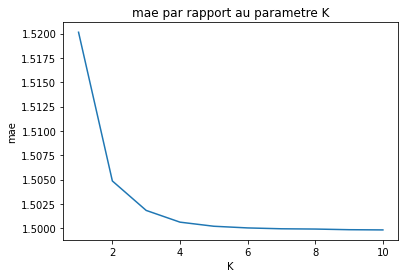

In [ ]:
plt.rc("font")
plt.plot( results_df["param_k"],results_df["mean_test_mae"],)
plt.title("mae par rapport au parametre K")
plt.xlabel("K")
plt.ylabel("mae")
plt.show()

In [ ]:

!surprise -algo KNNBasic -params 


error: argument -params: expected one argument
usage: surprise [-h] [-algo <prediction algorithm>]
                [-params <algorithm parameters>]
                [-load-builtin <dataset name>] [-load-custom <file path>]
                [-folds-files <train1 test1 train2 test2... >]
                [-reader <reader>] [-n-folds <number of folds>]
                [-seed <random seed>] [--with-dump] [-dump-dir <dir>]
                [--clean] [-v]

Evaluate the performance of a rating prediction algorithm on a given dataset
using cross validation. You can use a built-in or a custom dataset, and you
can choose to automatically split the dataset into folds, or manually specify
train and test files. Please refer to the documentation page
(http://surprise.readthedocs.io/) for more details.

optional arguments:
  -h, --help            show this help message and exit
  -algo <prediction algorithm>
                        The prediction algorithm to use. Allowed values are
                     

In [ ]:
param_grid = {'k': [1,2,3,4,5,6,7,8,9,10],
              'sim_options': {'name': ['pearson_baseline'],
                              
                              'user_based': [True]}
              }
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'])

gs.fit(data1)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

dapres les resultat \\
on remarque que svd donne les meilleur resultat sur notre dataset
